In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
from IPython import display

In [2]:
from sportsref.baseball import Season

In [3]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.07)

In [4]:
def get_szn(year):
    df = Season(year).batting_pages('standard').get_df('teams_standard_batting')
    df['year'] = year
    return df

In [5]:
df = pd.concat([ get_szn(yr) for yr in [2020,2021] ])

Available tables: ['teams_standard_batting', 'players_standard_batting']
Available tables: ['teams_standard_batting', 'players_standard_batting']


In [6]:
plot_df = df.query("Tm !='League Average'")

In [7]:
plt.xkcd()

CPU times: user 2min 18s, sys: 22.5 s, total: 2min 40s
Wall time: 2min 10s


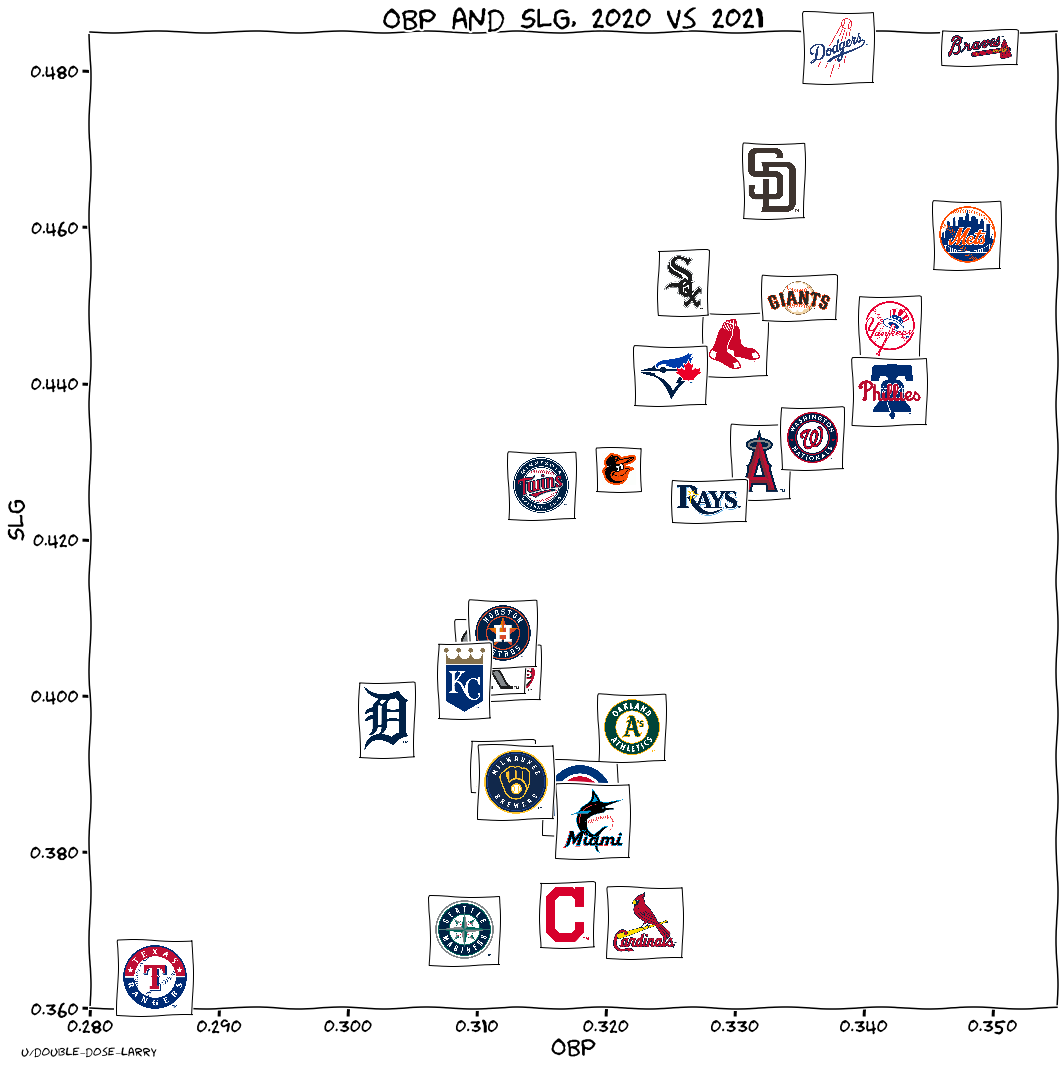

In [21]:
%%time
fig, ax = plt.subplots(figsize=(15,15))

plt.xlim((0.28,.355))
plt.ylim((0.36,.485))

teams = plot_df.Tm.unique()

def get_points_for_team(team):
#     print(team)
    team_df = plot_df.query(f"Tm == '{team}'")
    x1, x2 = team_df.OBP
    y1, y2 = team_df.SLG
    return ((x1, y1), (x2,y2))

def get_slope_intercept(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    slope = (y2-y1)/(x2-x1)
    intercept = y1 - slope*x1
    return slope, intercept

imgs20 = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm}.png'),
                      (get_points_for_team(tm)[0]),
                       frameon=True
                      )
    )
    for tm in teams
]



def animate(frame):
    
    # update plot
    for index,tm in enumerate(teams):
        logo = imgs20[index]
        p1, p2 = get_points_for_team(tm)
        slope, intercept = get_slope_intercept(p1,p2)
        xs = np.linspace(p1[0], p2[0], 100)
        x = xs[frame]
        y = slope*x + intercept
        logo.xyann = (x,y)


ax.set_xlabel("OBP", size=25)
ax.set_ylabel("SLG", size=25)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax.tick_params(axis='both', labelsize=20)

plt.title("OBP and SLG, 2020 vs 2021", size=30)
plt.tight_layout()
#sign
plt.annotate('u/double_dose_larry',
            xy=(.02, .02), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)


anim = FuncAnimation(fig, animate, frames=100, interval=50)

anim.save('anim.mp4')
# # video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# plt.close()

['Arizona Diamondbacks' 'Atlanta Braves' 'Baltimore Orioles'
 'Boston Red Sox' 'Chicago Cubs' 'Chicago White Sox' 'Cincinnati Reds'
 'Cleveland Indians' 'Colorado Rockies' 'Detroit Tigers' 'Houston Astros'
 'Kansas City Royals' 'Los Angeles Angels' 'Los Angeles Dodgers'
 'Miami Marlins' 'Milwaukee Brewers' 'Minnesota Twins' 'New York Mets'
 'New York Yankees' 'Oakland Athletics' 'Philadelphia Phillies'
 'Pittsburgh Pirates' 'San Diego Padres' 'Seattle Mariners'
 'San Francisco Giants' 'St. Louis Cardinals' 'Tampa Bay Rays'
 'Texas Rangers' 'Toronto Blue Jays' 'Washington Nationals']


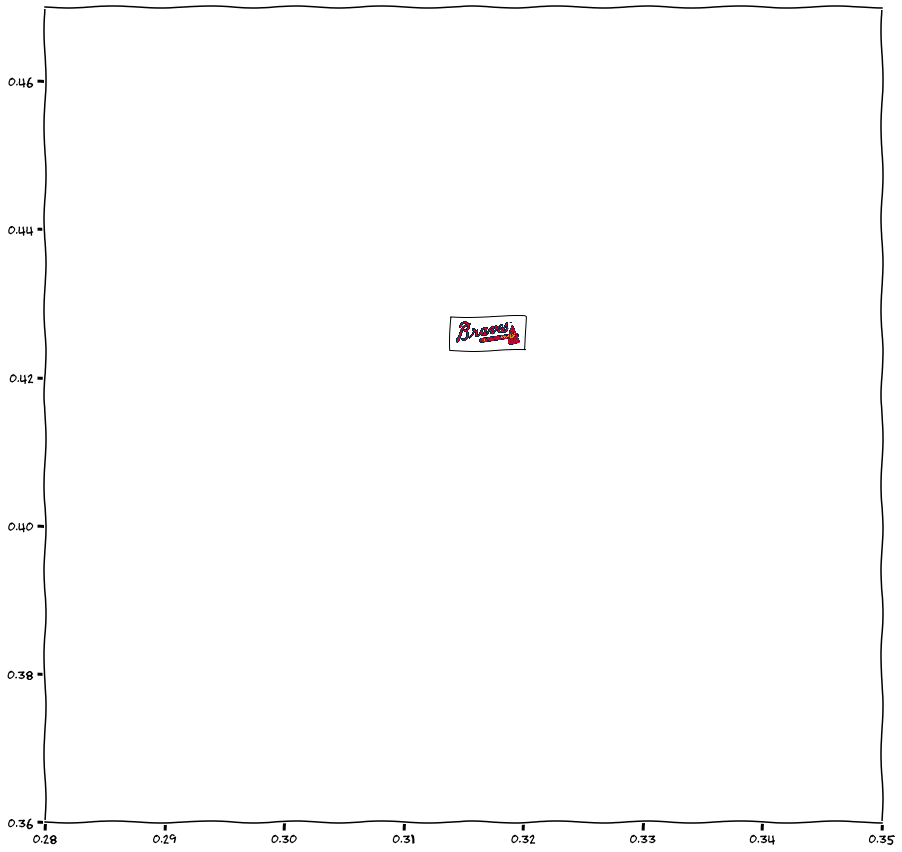

In [19]:
fig, ax = plt.subplots(figsize=(15,15))

plt.xlim((0.28,.35))
plt.ylim((0.36,.47))

teams = plot_df.Tm.unique()
print(teams)

# imgs20 = [
#     ax.add_artist(
#         AnnotationBbox(getImage(f'{tm}.png'),
#                       (get_points_for_team(tm)[0]),
#                        frameon=True
#                       )
#     )
#     for tm in teams
# ]

ax.add_artist(
    AnnotationBbox(getImage(f'Atlanta Braves.png'),
                  (.317, .426),
                   frameon=True
                  )
)